In [9]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
crime = pd.read_csv('../data/denver_crime.csv')
cols = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE']
for col in cols:
    crime[col] = pd.to_datetime(crime[col], format='%m/%d/%Y %I:%M:%S %p')

In [244]:
crime['year']=crime.FIRST_OCCURRENCE_DATE.dt.year
crime['month']=crime.FIRST_OCCURRENCE_DATE.dt.month
crime.head()

INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2018869789   2018869789239900          2399                       0   
1    202111218    202111218570700          5707                       0   
2  20176005213  20176005213239901          2399                       1   
3  20196012240  20196012240230800          2308                       0   
4   2018861883   2018861883501600          5016                       0   

                  OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
0                     theft-other             larceny   2018-12-27 15:58:00   
1            criminal-trespassing    all-other-crimes   2021-01-06 21:20:00   
2                   theft-bicycle             larceny   2017-06-08 13:15:00   
3                 theft-from-bldg             larceny   2019-12-07 13:07:00   
4  violation-of-restraining-order    all-other-crimes   2018-12-22 20:15:00   

  LAST_OCCURRENCE_DATE       REPORTED_DATE     INCIDENT_ADDRESS  ...  \
0                  NaT 2018-12-27 16:51:00    2681 N HANOVER CT  ...   
1                  NaT 2021-01-07 00:23:00      1701 WYNKOOP ST  ...   
2  2017-06-08 17:15:00 2017-06-12 08:44:00         1705 17TH ST  ...   
3  2019-12-07 18:30:00 2019-12-09 13:35:00     1350 N IRVING ST  ...   
4  2018-12-22 20:31:00 2018-12-22 22:00:00  13625 E RANDOLPH PL  ...   

       GEO_Y     GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID  \
0  1700715.0 -104.866156  39.755561          5.0        512.0   
1  1699567.0 -104.999951  39.753054          6.0        612.0   
2  1699792.0 -104.999264  39.753669          6.0        612.0   
3  1694088.0 -105.029208  39.738134          1.0        122.0   
4  1716158.0 -104.828868  39.797750          5.0        521.0   

   NEIGHBORHOOD_ID IS_CRIME  IS_TRAFFIC  year  month  
0        stapleton        1           0  2018     12  
1    union-station        1           0  2021      1  
2    union-station        1           0  2017      6  
3      west-colfax        1           0  2019     12  
4        montbello        1           0  2018     12  

[5 rows x 21 columns]

In [245]:
crime.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'year', 'month'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

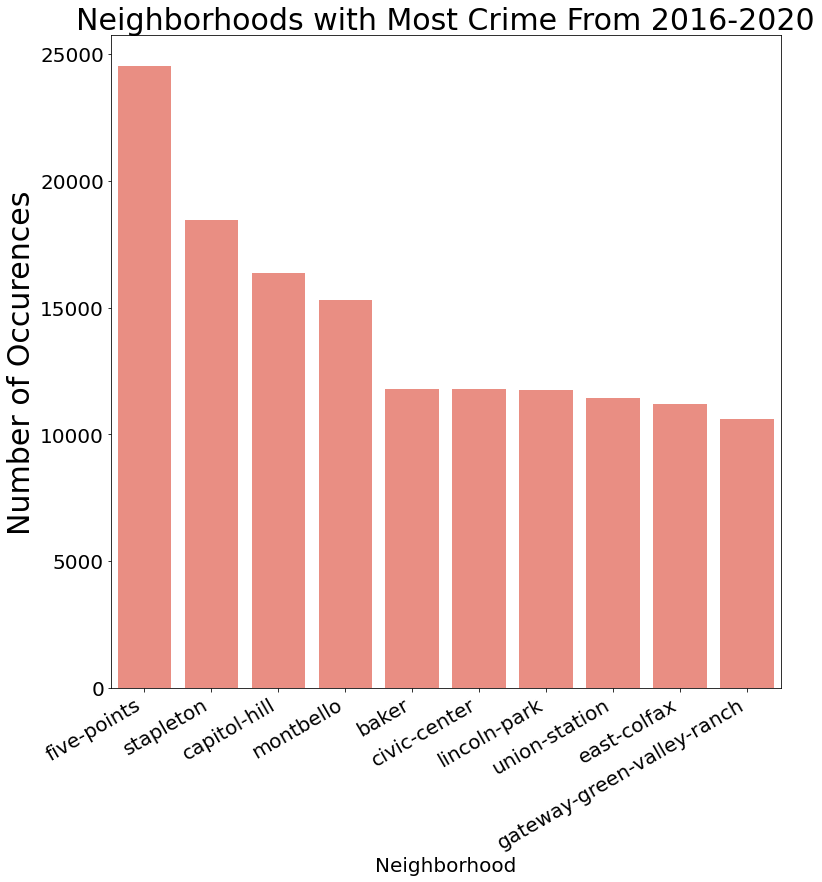

In [79]:
plt.subplots(figsize=(12,12))
crime = crime[(crime.year!= 2021) & (crime.NEIGHBORHOOD_ID!='cbd')]
neighborhood = crime.groupby('NEIGHBORHOOD_ID').size().sort_values(ascending=False).reset_index()
neighborhood.rename(columns={'NEIGHBORHOOD_ID':'Neighborhood', 0:'Count'}, inplace=True)
top_ten = neighborhood[:10]
g = sns.barplot(y='Count', x='Neighborhood', data=top_ten, color='salmon')
g.axes.set_title("Neighborhoods with Most Crime From 2016-2020",fontsize=30)
g.set_ylabel("Number of Occurences",fontsize=30)
g.set_xlabel("Neighborhood",fontsize=20)
g.tick_params(labelsize=20)
plt.xticks(rotation = 30, ha='right')


In [80]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436026 entries, 0 to 454539
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   INCIDENT_ID             436026 non-null  int64         
 1   OFFENSE_ID              436026 non-null  int64         
 2   OFFENSE_CODE            436026 non-null  int64         
 3   OFFENSE_CODE_EXTENSION  436026 non-null  int64         
 4   OFFENSE_TYPE_ID         436026 non-null  object        
 5   OFFENSE_CATEGORY_ID     436026 non-null  object        
 6   FIRST_OCCURRENCE_DATE   436026 non-null  datetime64[ns]
 7   LAST_OCCURRENCE_DATE    147061 non-null  datetime64[ns]
 8   REPORTED_DATE           436026 non-null  datetime64[ns]
 9   INCIDENT_ADDRESS        396872 non-null  object        
 10  GEO_X                   432259 non-null  float64       
 11  GEO_Y                   432259 non-null  float64       
 12  GEO_LON                 432258

In [86]:
loc = crime.groupby(['GEO_LAT','GEO_LON','NEIGHBORHOOD_ID']).size()

In [83]:
432258-92949

339309

In [154]:
loc = loc.reset_index()
loc.head()

index    GEO_LAT       GEO_LON NEIGHBORHOOD_ID    0
0      0   0.000000  5.000000e-07             dia    5
1      1   0.000001 -2.400000e-06             dia  155
2      2   3.000001 -1.300000e-06             dia    1
3      3  34.638236 -1.154641e+02         marston    1
4      4  39.614406 -1.050912e+02         marston   11

In [151]:
crime['GEO_LAT'].mean(), crime['GEO_LON'].mean()

(39.71771491670839, -104.92088353935699)

In [159]:
fmap = folium.Map([39.7177, -104.9208])

for lat, long in zip(loc['GEO_LAT'],loc['GEO_LON']):
     folium.CircleMarker([lat, long],
                            #popup=area,
                            color='r',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color='r',
                           ).add_to(fmap)
#fmap

16563

In [186]:
tmp = crime[crime.OFFENSE_CATEGORY_ID == 'larceny']
tmp = tmp[tmp.year == 2020]
loc = tmp.groupby(['GEO_LAT','GEO_LON','NEIGHBORHOOD_ID']).size().reset_index()

first_map = folium.Map([39.7177, -104.9208], zoom_start=11)

for lat, long in zip(loc['GEO_LAT'],loc['GEO_LON']):
     folium.CircleMarker([lat, long],
                            color='red',
                            radius = 0.01,
                            fill=True,
                            popup = '',
                            fill_opacity=0.5,
                            fill_color='red',
                           ).add_to(first_map)
        

In [248]:
tmp = crime[crime.OFFENSE_CATEGORY_ID == 'larceny']
tmp = tmp[tmp.year == 2020]
loc = tmp.groupby(['GEO_LAT','GEO_LON','NEIGHBORHOOD_ID']).size().reset_index().rename(columns={0:'count'})

def crime_marking(x):
    folium.Circle(location = [x[0], x[1]],
                 radius=0.01,
                 color = 'red',
                 fill=True,
                 fill_opacity=0.25,
                 fill_color='red').add_to(m)


m = folium.Map([39.7177, -104.9208], zoom_start=11)
loc[['GEO_LAT', 'GEO_LON']].apply(lambda x: crime_marking(x), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
5291    None
5292    None
5293    None
5294    None
5295    None
Length: 5296, dtype: object

In [217]:
m

In [247]:
from folium.plugins import MarkerCluster

m = folium.Map([39.7177, -104.9208], zoom_start=11)
fg = folium.FeatureGroup(name='Larceny', show=False)
m.add_child(fg)
marker_cluster = folium.plugins.MarkerCluster().add_to(fg)
folium.TileLayer('openstreetmap').add_to(m)
folium.LayerControl().add_to(m)

def crime_marking(x):
    folium.Circle(location = [x[0], x[1]],
                    overlay=True, control=True).add_to(marker_cluster)

loc[['GEO_LAT', 'GEO_LON']].apply(lambda x: crime_marking(x), axis=1)
m

In [231]:
crime.head()
tmp = crime[crime.year==2020].copy()
tmp.OFFENSE_CATEGORY_ID.unique()

array(['all-other-crimes', 'larceny', 'auto-theft', 'public-disorder',
       'traffic-accident', 'theft-from-motor-vehicle',
       'white-collar-crime', 'aggravated-assault',
       'other-crimes-against-persons', 'sexual-assault', 'robbery',
       'burglary', 'drug-alcohol', 'murder', 'arson'], dtype=object)

In [240]:
def crime_marking(x):
    folium.Circle(location = [x[0], x[1]],
                    overlay=True, control=True).add_to(marker_cluster)
    

    
    
mapa = folium.Map([39.7177, -104.9208], zoom_start=11)

for category in zip(tmp.OFFENSE_CATEGORY_ID.unique()):
    x = folium.FeatureGroup(name=f'{category}', show=False)
    mapa.add_child(x)
    marker_cluster = folium.plugins.MarkerCluster().add_to(x)
    folium.TileLayer('openstreetmap').add_to(mapa)
    folium.LayerControl().add_to(mapa)
    loc = tmp[tmp.OFFENSE_CATEGORY_ID==category].dropna()
    loc[['GEO_LAT', 'GEO_LON']].apply(lambda x: crime_marking(x), axis=1)
                                      
mapa